3rd EXERCISE SESSION
===
|**NAME**| **KENICHI ITO** |
| :- | :- |
|**STUDENT ID**|**305056**|

# Exercises 3

In [1]:
import scipy
import scipy.stats
import numpy as np
from numpy import matlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import math

# matplotlib.rc('text', usetex=True)
# params = {'text.latex.preamble': [r"\usepackage{amsmath}"]}
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
# plt.rcParams.update(params)

tab10 = cm.get_cmap(name="tab10")
cols = tab10.colors[0:3]

## 1. Explore the Markov inequality in some special cases as follows:
1. (a) A non-negative random variable has $E(X) = 2$. Find an upper bound for $P(X{\ge}5)$.
2. (b) Let $X {\sim} \mathrm{Exponential}(\beta)$ and $Y {\sim} \mathrm{Binomial}(n, p)$ so that $n = 20$ and $E(X) = E(Y) = 2$. Find the true probability $P(X > 5)$ and compare to (a).

### (a)

From markov inequation,

$$
\begin{align*}
%-----------------------------------------
P(X{>}t)
&{\ \le\ }
\frac{E(X)}{t}
\\
P(X{>}5)
&{\ \le\ }
\frac{2}{5}
%-----------------------------------------
\end{align*}
$$

Hence, the upper bound of $P(X{\ge}5)$ is $\frac{2}{5}=0.4$.

### (b)

#### for $E(X)$, $X {\sim} \mathrm{Exponential}(\beta)$:

$$
\begin{align*}
%---------------------
E(X) 
&=
\beta
\\
%---------------------
2
&=
\beta
\\
%---------------------
\end{align*}
$$

#### for $E(Y)$, $Y {\sim} \mathrm{Binomial}(n=20,p)$:

*pdf* of Y is,

$$
\begin{align*}
%---------------------
P(Y=k, n=20)
&=
{}_{20}\mathrm{C}_{k}
p^k(1-p)^{20-k}.
\\
%---------------------
\end{align*}
$$

#### for $E(X)$, $X {\sim} \mathrm{Exponential}(\beta)$.
$$
\begin{align*}
%---------------------
E(Y)
&=
\sum_{k=0}^{n}
k{\cdot}{}_{n}\mathrm{C}_{k}
p^k(1-p)^{n-k}
\\
%---------------------
&=
\sum_{k=1}^{n}
k{\cdot}
{}_{n}\mathrm{C}_{k}
p^k(1-p)^{n-k}
\\
%---------------------
&=
n
\sum_{k=1}^{n}
    {}_{n-1}\mathrm{C}_{k-1}
    p^k
    (1-p)^{n-k}
{\ \ \ \ \ \ }
{\because\ } 
    k
    {\cdot}
    {}_{n}\mathrm{C}_{k}
    = 
    n
    {\cdot}
    {}_{n-1}\mathrm{C}_{k-1} 
\\
%---------------------
&=
np
\sum_{k=1}^{n}
    {}_{n-1}\mathrm{C}_{k-1}
    p^{k-1}
    (1-p)^{n-k}
\\
%---------------------
&=
np
\sum_{m=0}^{n-1}
    {}_{n-1}\mathrm{C}_{m}
    p^{m}
    (1-p)^{n-(m+1)}
{\ \ \ \ \ \ }
(\text{let }k-1=m.)
\\
%---------------------
&=
np
\sum_{m=0}^{n-1}
    {}_{n-1}\mathrm{C}_{m}
    p^{m}
    (1-p)^{(n-1)-m}
\\
%---------------------
&=
np
(p+ (1-p) )^{n-1}
{\ \ \ \ \ \ }
{\because\ } 
(x+y)^{n} 
= 
\sum_{i=1}^{n}
{}_{n}\mathrm{C}_{i} x^{i} y^{n-i}
\\
%---------------------
&=
np
.
%---------------------
\end{align*}
$$

Now, $E(Y)=2$ and $n=20$, then
$$
\begin{align*}
%---------------------
E(Y)
&=
np
\\
2
&=
20p
\\
p
&=
\frac{1}{10}.
%---------------------
\end{align*}
$$

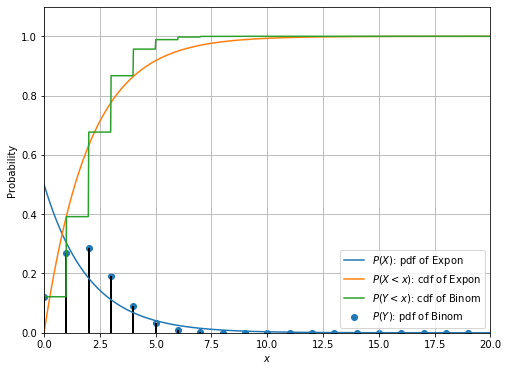

In [106]:
X_expon = scipy.stats.expon(scale=2,loc=0)
X_binom = scipy.stats.binom(n=20,p=0.1)
#-----------------------------------------------------------
X=np.linspace(0,20,1000)
X_disc=np.arange(0,20)

fig_ = plt.figure(figsize=(8,6))
ax_ = plt.subplot(111)

ax_.plot(X, X_expon.pdf(X), label="$P(X)$: pdf of Expon")
ax_.vlines(X_disc,0, X_binom.pmf(X_disc),
           linestyle="-", lw=2)
ax_.scatter(X_disc, X_binom.pmf(X_disc),
            label="$P(Y)$: pdf of Binom",
            linestyle="-")
ax_.plot(X, X_expon.cdf(X), label="$P(X<x)$: cdf of Expon")
ax_.plot(X, X_binom.cdf(X), label="$P(Y<x)$: cdf of Binom")
#-----------------------------------------------------------
ax_.grid(True)
# ax_.axis('equal')
ax_.legend(fontsize=24)
ax_.axes.set_ylabel("Probability")
ax_.axes.set_xlim(0,20)
ax_.axes.set_ylim(0,1.1)
ax_.axes.set_xlabel("$x$")

ax_.legend()
ax_.grid(True)

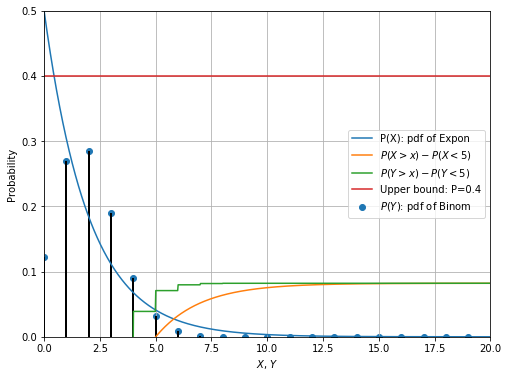

In [151]:
X_expon = scipy.stats.expon(scale=2,loc=0)
X_binom = scipy.stats.binom(n=20,p=0.1)
#-----------------------------------------------------------
X=np.linspace(0,20,1000)
X_disc=np.arange(0,20)

fig_ = plt.figure(figsize=(8,6))
ax_ = plt.subplot(111)

ax_.plot(X, X_expon.pdf(X), label="P(X): pdf of Expon")
ax_.vlines(X_disc,0, X_binom.pmf(X_disc),
           linestyle="-", lw=2)
ax_.scatter(X_disc, X_binom.pmf(X_disc),
            label="$P(Y)$: pdf of Binom",
            linestyle="-")
ax_.plot(X, X_expon.cdf(X)-X_expon.cdf(5), label="$P(X>x)-P(X<5)$")
ax_.plot(X, X_binom.cdf(X)-X_expon.cdf(5), label="$P(Y>x)-P(Y<5)$")
ax_.plot(X, 0.4*np.ones(X.shape), 
         label="Upper bound: P=0.4")
#-----------------------------------------------------------
ax_.grid(True)
# ax_.axis('equal')
ax_.legend(fontsize=24)
ax_.axes.set_ylabel("Probability")
ax_.axes.set_xlim(0,20)
ax_.axes.set_ylim(0,.5)
ax_.axes.set_xlabel("$X$, $Y$")

ax_.legend()
ax_.grid(True)

In [148]:
expected_expon = scipy.integrate.quad(lambda x: x*X_expon.pdf(x), 0,1000)
X_disc = np.arange(0,20)
expected_binom = np.sum(X_disc*X_binom.pmf(X_disc))
print("E(X) = {0:.16f} ≒ {1:}".format(expected_expon[0], 2) )
print("E(Y) = {0:.16f} ≒ {1:}".format(expected_binom, 2) )

print("P(X>5) = {0:8.6f} < {1:}".format(1-X_expon.cdf(5), 0.4) )
print("P(Y>5) = {0:8.6f} < {1:}".format(1-X_binom.cdf(5), 0.4) )

E(X) = 2.0000000000000004 ≒ 2
E(Y) = 1.9999999999999976 ≒ 2
P(X>5) = 0.082085 < 0.4
P(Y>5) = 0.011253 < 0.4


## 2. Upper bound from Chebyshev's iquation.
Assume that $\mathrm{E}(X) = 5$ and $\mathrm{Var}(X) = 5$.
- (a) Find an upper limit for $P(|X-E(X)|{\ge}10)$ using Chebyshev's inequality.
- (b) Consider two different probability distributions that fulfill the conditions for $E(X)$ and $var(X)$. Compute $P(|X-E(X)|{\ge}10)$ for these and compare to the upper limit you got in (a).

### (a) upper limit for $P(|X-E(X)|{\ge}10)$

From Chebyshev's inequation,

$$
\begin{align*}
%-----------------------------------------
P(|X-\mathrm{E}(X)|{\ge}t)
&{\ \le\ }
\frac{\mathrm{Var}(X)}{t^2}
\\
%-----------------------------------------
P(|X-\mathrm{E}(X)|{\ge}10)
&{\ \le\ }
\frac{5}{10^2}
\\
%-----------------------------------------
P(|X-\mathrm{E}(X)|{\ge}10)
&{\ \le\ }
\frac{5}{100}
\\
%-----------------------------------------
\end{align*}
$$

Hence, the upper bound of $P(|X-\mathrm{E}(X)|{\ge}10)$ is $\frac{5}{100}=0.05$.

### (b) probability distributions that fulfill the conditions for E(X) and var(X).

In [215]:
X_norm = scipy.stats.norm(loc=5,scale=np.sqrt(5))
print("Noraml distribution: \n  Mean ={0:5},\n  Variance ={1:10}".format(X_norm.mean(), X_norm.var()) )

X_logist = scipy.stats.logistic(loc=5,scale=np.sqrt(5*3/(np.pi)**2))
print("Logistic distribution:\n  Mean ={0:5},\n  Variance ={1:10}".format(X_logist.mean(), X_logist.var()) )

X_laplace = scipy.stats.laplace(loc=5,scale=np.sqrt(5/2))
print("Double exponential distribution:\n  Mean ={0:5},\n  Variance ={1:10}".format(X_laplace.mean(), X_laplace.var()) )

X_poisson = scipy.stats.poisson(loc=0,mu=5)
print("Poisson distribution:\n  Mean ={0:5},\n  Variance ={1:10}".format(X_poisson.mean(), X_poisson.var()) )

X_list=[X_norm, X_logist, X_laplace, X_poisson]
labels=["Norm","Logistic","Laplace", "Poisson"]

Noraml distribution: 
  Mean =  5.0,
  Variance =5.000000000000001
Logistic distribution:
  Mean =  5.0,
  Variance =5.000000000000001
Double exponential distribution:
  Mean =  5.0,
  Variance =5.000000000000001
Poisson distribution:
  Mean =  5.0,
  Variance =       5.0


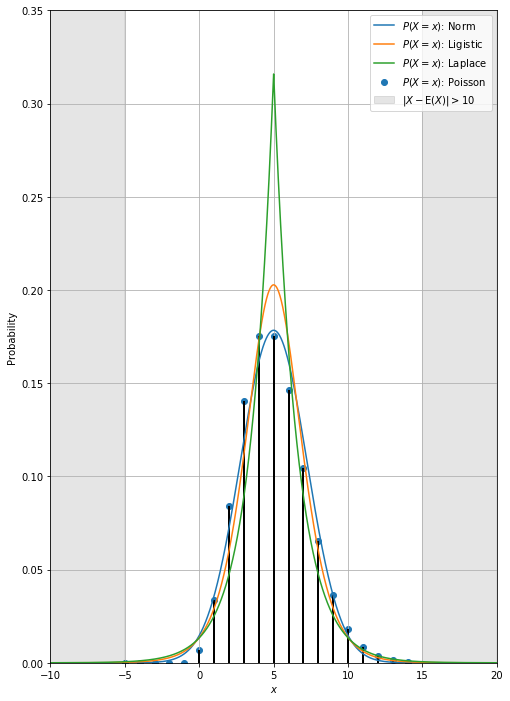

In [241]:
X=np.linspace(-15+5,15+5,10000)
X_disc=np.arange(-10+5,10+5)
p_zero = np.zeros(X.shape)
p_one  = np.ones(X.shape)
X_outer = np.abs(X-5)>=10

#-----------------------------------------------------------
fig_ = plt.figure(figsize=(8,12))
ax_ = plt.subplot(111)

#
ax_.plot(X, X_norm.pdf(X), label="$P(X=x)$: Norm")
ax_.plot(X, X_logist.pdf(X), label="$P(X=x)$: Ligistic")
ax_.plot(X, X_laplace.pdf(X), label="$P(X=x)$: Laplace")

ax_.vlines(X_disc,0, X_poisson.pmf(X_disc),
           linestyle="-", lw=2)
ax_.scatter(X_disc, X_poisson.pmf(X_disc),
            label="$P(X=x)$: Poisson",
            linestyle="-")
fill_    = ax_.fill_between(X, p_zero, X_outer, where=X_outer,
                            color="k", alpha=0.1,
                            label="$|X-\mathrm{E}(X)|>10$")
#-----------------------------------------------------------
ax_.grid(True)
# ax_.axis('equal')
ax_.legend(fontsize=24)
ax_.axes.set_ylabel("Probability")
ax_.axes.set_xlim(-10,20)
ax_.axes.set_ylim(0,0.35)
ax_.axes.set_xlabel("$x$")

ax_.legend()
ax_.grid(True)

$$
\begin{align*}
%
P(|X-\mathrm{E}(X)|{\ge}t) 
&=
    P(X {\ \le\ } \mathrm{E}(X)-t)
    +
    P(\mathrm{E}(X)+t {\ \le\ } X)
\\%
P(|X-5|{\ge}10) 
&=
    P(X {\ \le\ } -5)
    +
    P(15 {\ \le\ } X)
%
\end{align*}
$$

In [301]:
upper_lim = 5/100
mu=5
var=5
t=10
P_outer = lambda X,mu,margin: X.cdf(mu-margin)+(1-X.cdf(mu+margin))

for X,l in zip(X_list, labels):
    print(l)
    P_outer(X_norm,mu,t)
    print("\tP(|X-{0:}|>{1:}) \n\t = {2:>.10f} \n\t < {3:}".format(mu,t,
                                                    P_outer(X,mu,t), upper_lim) )

Norm
	P(|X-5|>10) 
	 = 0.0000077442 
	 < 0.05
Logistic
	P(|X-5|>10) 
	 = 0.0005999224 
	 < 0.05
Laplace
	P(|X-5|>10) 
	 = 0.0017917628 
	 < 0.05
Poisson
	P(|X-5|>10) 
	 = 0.0000690082 
	 < 0.05


$P({\mid} X-\mu {\mid} {\ge} 3(\sigma))$

In [302]:
t=3*np.sqrt(var)
P_outer = lambda X,mu,margin: X.cdf(mu-margin)+(1-X.cdf(mu+margin))

for X,l in zip(X_list, labels):
    print(l)
    P_outer(X_norm,mu,t)
    print("\tP(|X-{0:}|>{1:}) \n\t = {2:>.10f}".format(mu,t,
                                                       P_outer(X,mu,t)) )

Norm
	P(|X-5|>6.708203932499369) 
	 = 0.0026997961
Logistic
	P(|X-5|>6.708203932499369) 
	 = 0.0086294460
Laplace
	P(|X-5|>6.708203932499369) 
	 = 0.0143695961
Poisson
	P(|X-5|>6.708203932499369) 
	 = 0.0054530919


## 3. Quantile
Take a closer look on the approximation we made in R- script MaxOfUniforms.R. Especially, compare the simulated tail probabilities based on the exponential quantiles as follows
- (a) Find the $0.9^{th}$ quantile of the $\mathrm{Exponential}(1)$ distribution.
- (b) Simulate $M = 100000$ (or more) realizations of sample maxima from the $\mathrm{Uniform}(0, 1)$ population for sample sizes $n = 2,...,50$.
    - Compute the proportion of the samples where $n(1 - x_{(n)})$ ($x_{(n)}$ is the observed maximum in the simulated sample of size $n$) is above the quantile you computed in (a).
    - Make a graph that shows this observed tail probability as a function of $n$. 
    - Comment the quality of the exponential approximation using this graph.
- (c) Repeat (a) and (b) using $0.95^{\mathrm{th}}$ and $0.99^{\mathrm{th}}$ quantiles.

### (a)

- *cdf* of $X {\sim} \mathrm{Exponential}(\beta=1)$, $F(x)=0.9$ is

$$
\begin{align*}
%--------------------------------
F(x) 
&=
1 - \mathrm{e}^{-x}
\\
%--------------------------------
\mathrm{e}^{-x}
&=
1 - F(x)
\\
%--------------------------------
\mathrm{e}^{-x}
&=
1 - 0.9
\\
%--------------------------------
-x \log { \mathrm{e} }
&=
\log (0.1)
\\
%--------------------------------
x
&{\ \approx\ }
2.3025850929940455
\\
%--------------------------------
\end{align*}
$$

In [45]:
print("loge({0:}) ={1:}".format(0.90,np.log(0.1)) )
expon = scipy.stats.expon(loc=0,scale=1)
print("the 0.9th quantile of exponential(1) is 2.3025850929940455.")
print("cdf(2.3025850929940455) = {0:.10f}.".format(expon.cdf(2.3025850929940455)))

loge(0.9) =-2.3025850929940455
the 0.9th quantile of exponential(1) is 2.3025850929940455.
cdf(2.3025850929940455) = 0.9000000000.


- $0.95^{\mathrm{th}}$ quantile is

$$
\begin{align*}
%--------------------------------
x 
&=
-\log (0.05)
\\
%--------------------------------
x
&{\ \approx\ }
2.995732273553991
\\
%--------------------------------
\end{align*}
$$

In [51]:
print("loge({0:}) ={1:}".format(0.95,np.log(0.05)) )
expon = scipy.stats.expon(loc=0,scale=1)
print("the 0.95th quantile of exponential(1) is 2.995732273553991.")
print("cdf(2.995732273553991) = {0:.10f}.".format(expon.cdf(2.995732273553991)))

loge(0.95) =-2.995732273553991
the 0.95th quantile of exponential(1) is 2.995732273553991.
cdf(2.995732273553991) = 0.9500000000.


- $0.99^{\mathrm{th}}$ quantile is

$$
\begin{align*}
%--------------------------------
x 
&=
-\log (0.01)
\\
%--------------------------------
x
&{\ \approx\ }
4.605170185988091
\\
%--------------------------------
\end{align*}
$$

In [50]:
print("loge({0:}) ={1:}".format(0.99,np.log(0.01)) )
expon = scipy.stats.expon(loc=0,scale=1)
print("the 0.99th quantile of exponential(1) is 4.605170185988091.")
print("cdf(4.605170185988091) = {0:.10f}.".format(expon.cdf(4.605170185988091)))

loge(0.99) =-4.605170185988091
the 0.99th quantile of exponential(1) is 4.605170185988091.
cdf(4.605170185988091) = 0.9900000000.


### (b)

In [32]:
m_size=100000
X_unif = scipy.stats.uniform(loc=0,scale=1)

x_n = np.array(
    [np.max( np.array([X_unif.rvs(size=m_size) for n in range(i_n) ]), axis=0) for i_n in range(1,51)]
)

In [33]:
X = np.array(
    [ (n+1)*(1-x_n[n,:]) for n in range(50) ]
)

In [20]:
nbins=100
def plot_expon(n0,n):
    ax_ = plt.subplot(5,2, n+1-n0)
    ax_.hist(X[n,:], bins=nbins, density=True,
            label="$x_{n="+str(n+1)+"}$"
            )
    x_max=max(np.max(X[n,:]),6)
    X_lin = np.linspace(0,x_max,100)
    X_expon = scipy.stats.expon(loc=0, scale=1)
    ax_.plot(X_lin, X_expon.pdf(X_lin),
            label="$\mathrm{Exponatial}(1)$"
            )

    #-----------------------------------------------------------
    ax_.grid(True)
    # ax_.axis('equal')
    ax_.legend(fontsize=24)
#     ax_.axes.set_ylabel("Probability")
    ax_.axes.set_xlim(0,6)
    ax_.axes.set_ylim(0,1.1)
    ax_.axes.set_xlabel("$x$")

    ax_.legend()
    ax_.grid(True)

#-----------------------------------------------------------

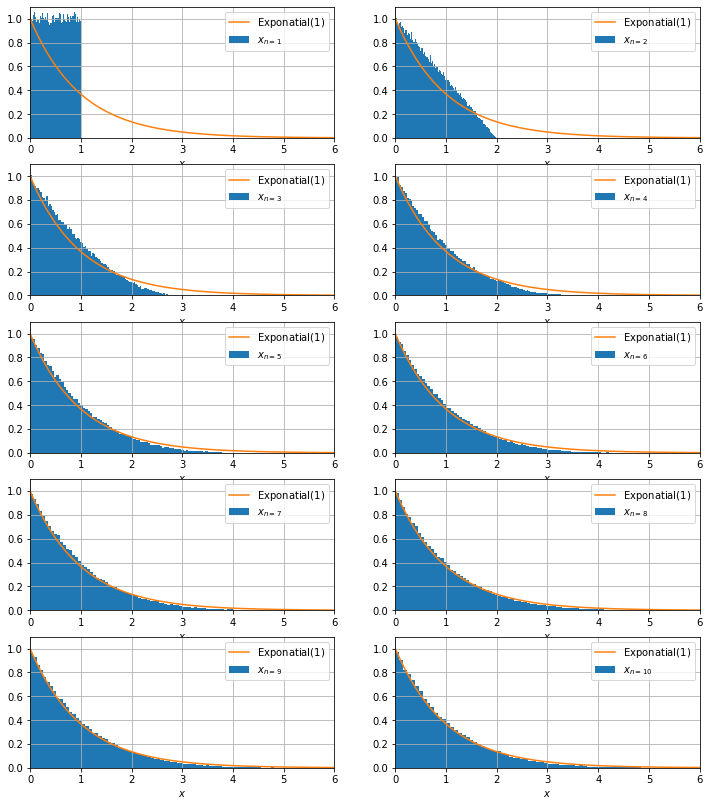

In [8]:
fig_ = plt.figure(figsize=(12,14))
for n in range(0,10):
    plot_expon(0,n)

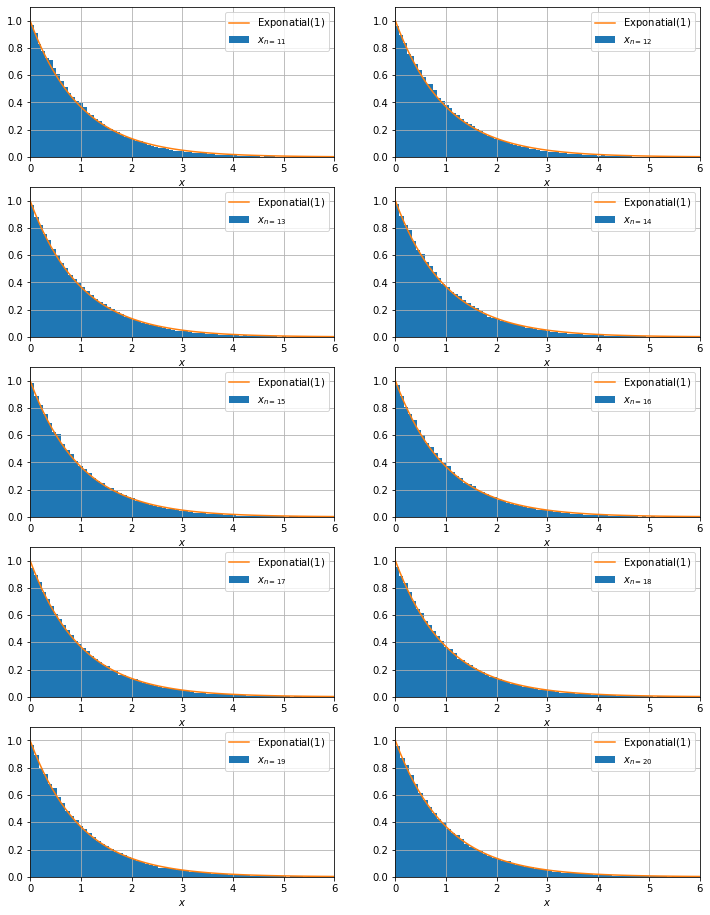

In [9]:
fig_ = plt.figure(figsize=(12,16))
for n in range(10,20):
    plot_expon(10,n)

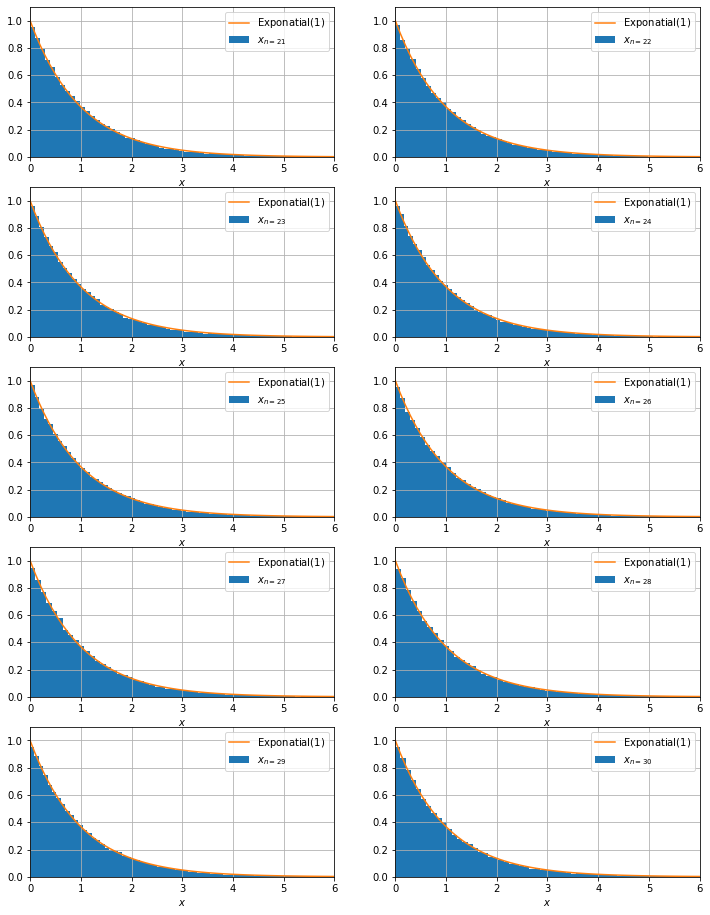

In [10]:
fig_ = plt.figure(figsize=(12,16))
for n in range(20,30):
    plot_expon(20,n)

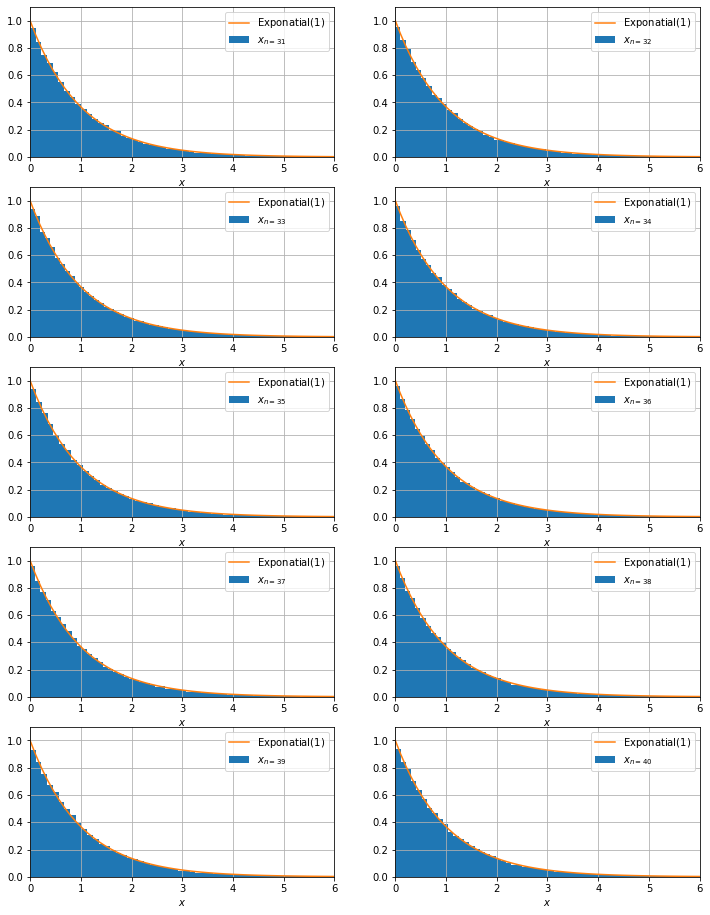

In [11]:
fig_ = plt.figure(figsize=(12,16))
for n in range(30,40):
    plot_expon(30,n)

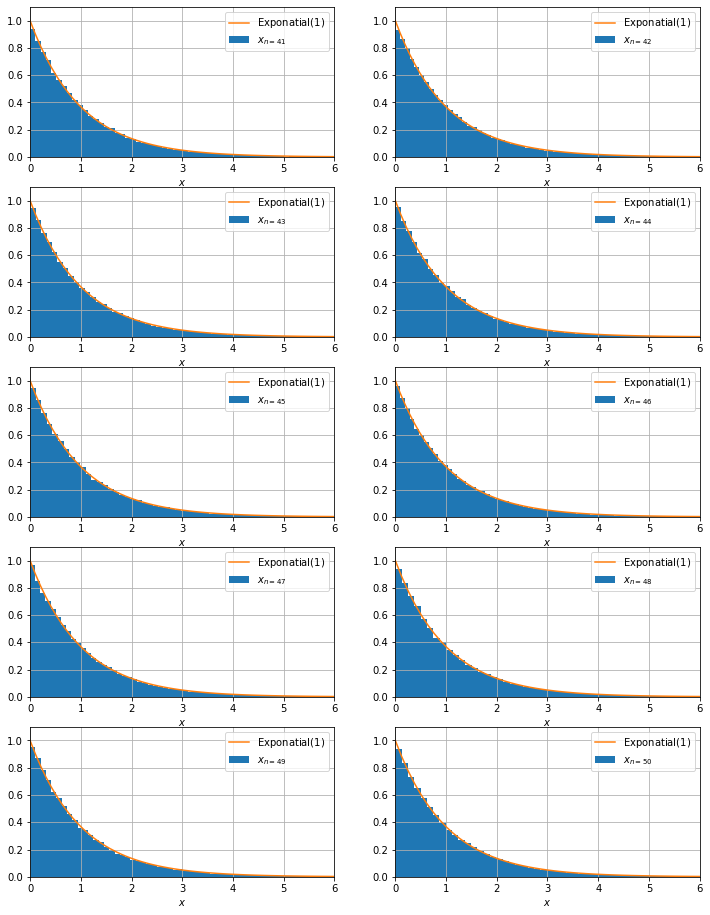

In [12]:
fig_ = plt.figure(figsize=(12,16))
for n in range(40,50):
    plot_expon(40,n)

Quality of approximation for exponential seems to be getting good with increase of $n$.

In [53]:
X_sorted = np.sort(X, axis=1)
X_90qtile=X_sorted[:,int(np.floor(0.90*X_sorted.shape[1]))]
X_95qtile=X_sorted[:,int(np.floor(0.95*X_sorted.shape[1]))]
X_99qtile=X_sorted[:,int(np.floor(0.99*X_sorted.shape[1]))]

#### Quantile function of $n$ ($0.90^{\mathrm{th}}$, $0.95^{\mathrm{th}}$, and $0.99^{\mathrm{th}}$ quantile)

(0, 50)

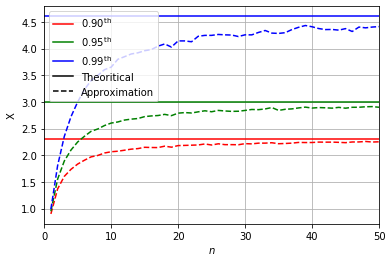

In [102]:
ax_ = plt.subplot(111)
ax_.plot(range(1,51),X_90qtile,
         color="r",linestyle="--")
ax_.plot(np.array([-1,51]), 2.3025850929940455*np.ones((2,1)),
         color="r",linestyle="-")

ax_.plot(range(1,51),X_95qtile,
        color="g",linestyle="--")
ax_.plot(np.array([-1,51]), 2.995732273553991*np.ones((2,1)),
        color="g",linestyle="-")

ax_.plot(range(1,51),X_99qtile,
         color="b",linestyle="--")
ax_.plot(np.array([-1,51]), 4.605170185988091*np.ones((2,1)),
         color="b",linestyle="-")
#------------------
dummies = [ax_.plot([], [], c="r",linestyle="-", label="$0.90^{\mathrm{th}}$" ),
           ax_.plot([], [], c="g",linestyle="-", label="$0.95^{\mathrm{th}}$"),
           ax_.plot([], [], c="b",linestyle="-", label="$0.99^{\mathrm{th}}$")]
lgd_xy=(0,1.25)
dummies = [ax_.plot([], [], c="k",linestyle="-", label="Theoritical"),
           ax_.plot([], [], c="k",linestyle="--", label="Approximation")]
lgd = ax_.legend(loc="upper left", fontsize=12)

# ax_.legend(dummies, ["Theoritical","Approximation"],
#            loc="upper left", fontsize=12,
# #            bbox_to_anchor=lgd_xy
#           )

ax_.set_xlabel("$n$")
ax_.set_ylabel("X")
ax_.grid()
ax_.legend()
ax_.set_xlim(0,50)
# _= ax_.add_artist(lgd)

In [112]:
print(X_90qtile[49,])
print(X_95qtile[49,])
print(X_99qtile[49,])

2.2516957024276807
2.899337461213858
4.411018289426494


#### Quantile function of $n$ ($0.95^{\mathrm{th}}$ quantile)

### (c) $0.95^{\mathrm{th}}$ and $0.99^{\mathrm{th}}$ quantiles.

|Level|Quantile<br>(Theoritical)| Quantile<br>(Approximation)|
|--|--|--|
|$0.90^{\mathrm{th}}$|2.3025850929940455|2.2516957024276807|
|$0.95^{\mathrm{th}}$|2.995732273553991|2.899337461213858|
|$0.99^{\mathrm{th}}$|4.605170185988091|4.411018289426494|